In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
MovieNums = pd.read_csv('Budget_clean.csv', index_col = [0])

# This week of the year will always contain the date generated except for 
# leap years that begin on Thursday, which will next occur in 2032 and last occurred in 2004.

week_dates = []
import datetime
d = "2017-W1"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
for w in range(0,52):
    week_index = (r+datetime.timedelta(weeks=w) + datetime.timedelta(days=2))
    week_dates.append(week_index.strftime("%d-%b"))
week_dates.append("31-Dec")
week_dates


MovieNums['Week Date'] = MovieNums['Week'].apply(lambda x: week_dates[x-1])
MovieNums.head()

,Release Date,Movie,Budget,Domestic Gross,Worldwide Gross,Year,Week,Dom_Profits,WW_Profits,Week Date
0,2009-12-18,Avatar,425000000,760507625,2789705275,2009,51,335507625,2364705275,20-Dec
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,20,-169536125,635063875,17-May
2,2019-04-26,Avengers: Endgame,400000000,856706929,2793009730,2019,17,456706929,2393009730,26-Apr
3,2019-06-07,Dark Phoenix,350000000,65609445,246300941,2019,23,-284390555,-103699059,07-Jun
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,18,128405868,1072413963,03-May


In [32]:
#adding Return on Investment column to normalize data
MovieNums['%ROI'] = 100 * MovieNums['Dom_Profits'] / MovieNums['Budget'] 

In [19]:
#Make a sub df of Week and ROI
MovieNumsWKROI = MovieNums[['Week', '%ROI']]
#Grouped by Week and Calculated the ROI
MovieNumsROI_Med = MovieNumsWKROI.groupby('Week').median()
#Sorted the df by Median ROIs
MovieNumsROI_Med.sort_values('%ROI', inplace = True)
#saved the sorted weeks as a list to feed into plot order
WeeksByROI = MovieNumsROI_Med.index.tolist()
#optional to limit limit list to top 25 ROI medians
TrunkWeeksByROI = WeeksByROI[-10::]
TrunkWeeks = sorted(TrunkWeeksByROI)


In [6]:
TrunkWeeksByROI.reverse()

In [7]:
TrunkWeeksByROI

[27, 22, 20, 31, 6, 30, 40, 26, 7, 28]

In [8]:
TrunkWeeks

[6, 7, 20, 22, 26, 27, 28, 30, 31, 40]

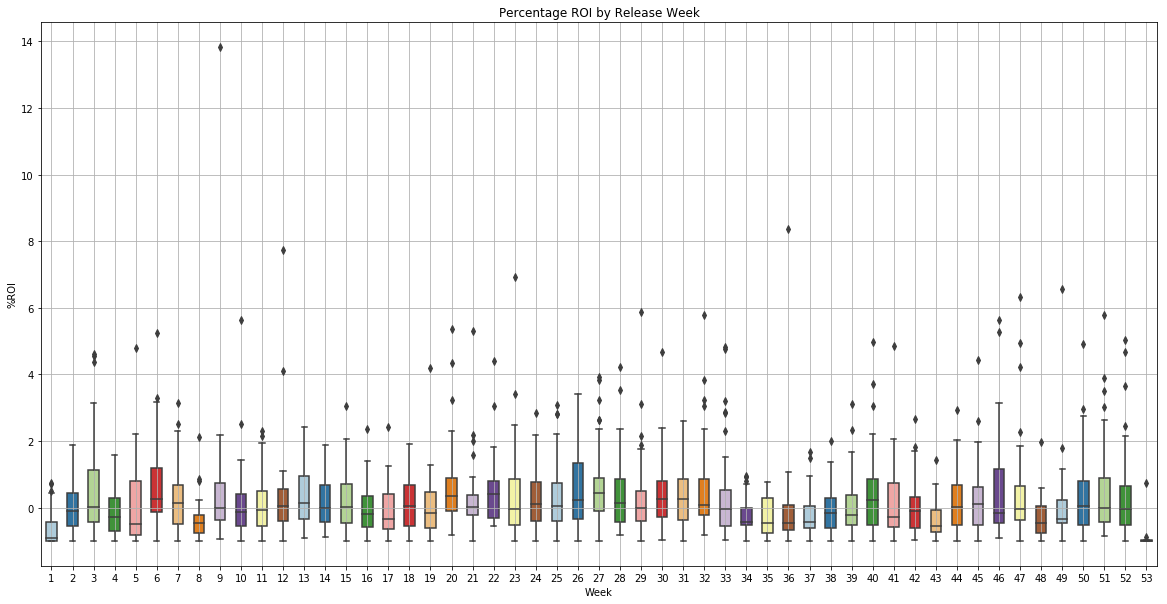

In [9]:
#plot %ROI by weeks
fig= plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired")
plt.grid()
plt.title("Percentage ROI by Release Week");


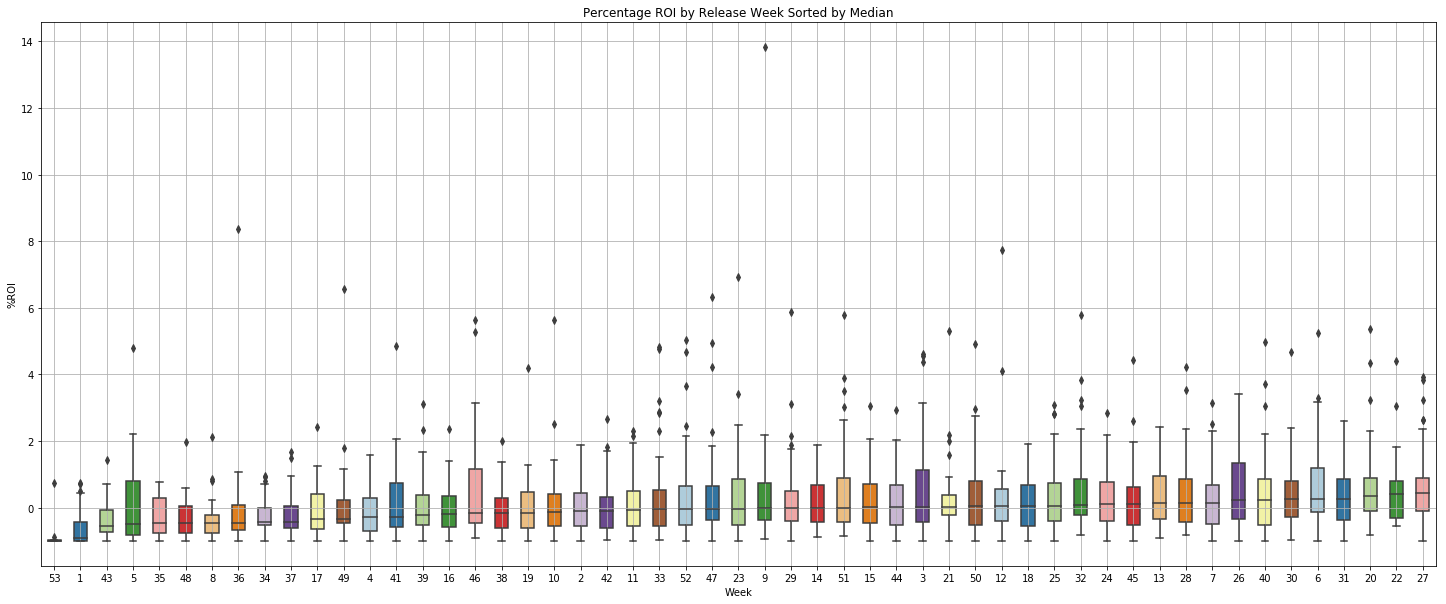

In [10]:
#plot %ROI by weeks sorted by median values
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = WeeksByROI )
plt.grid()
plt.title("Percentage ROI by Release Week Sorted by Median" );

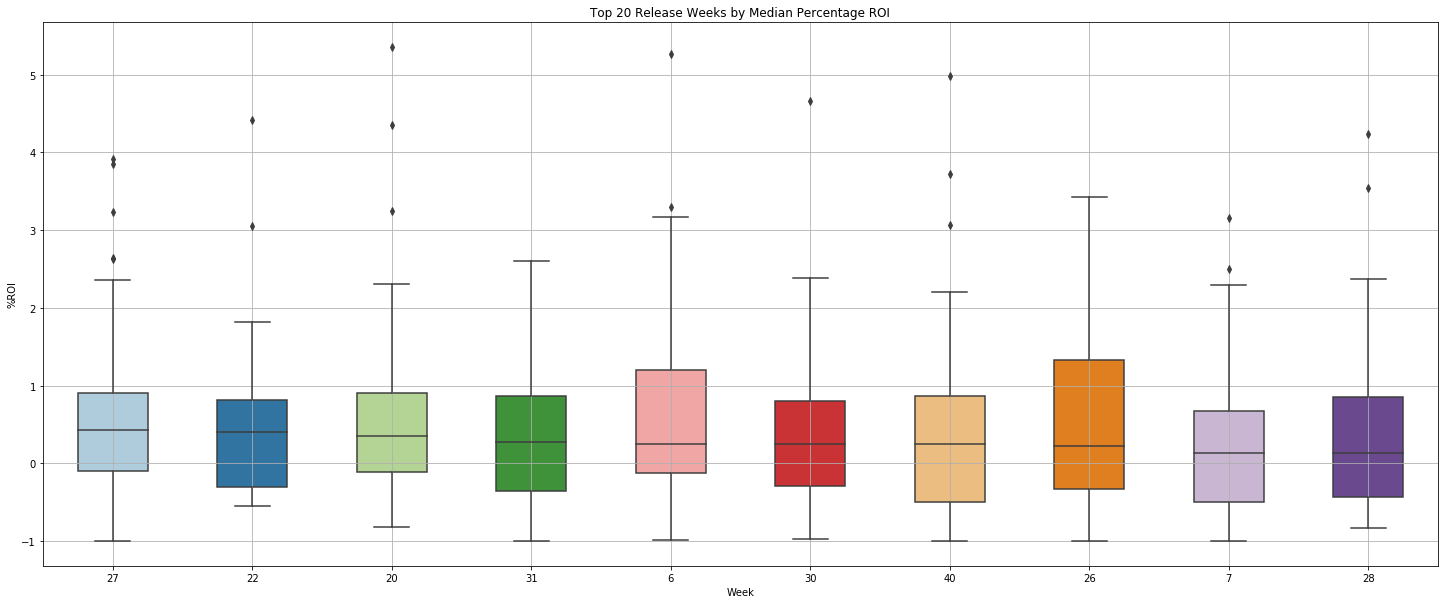

In [12]:
#plot top 20 median ROI values sorted by Median ROI
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeksByROI )
plt.grid()
plt.title("Top 20 Release Weeks by Median Percentage ROI");

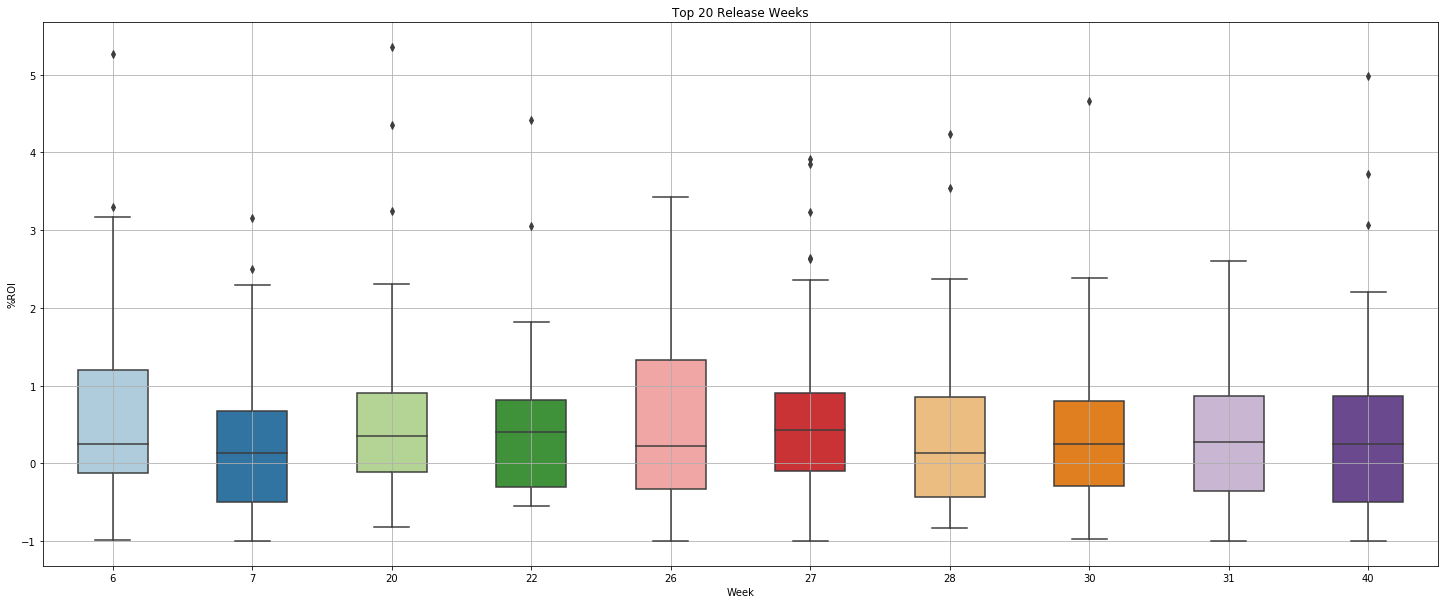

In [11]:
#plot top 20 median ROI values sorted by week
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeks )
plt.grid()
plt.title("Top 20 Release Weeks");

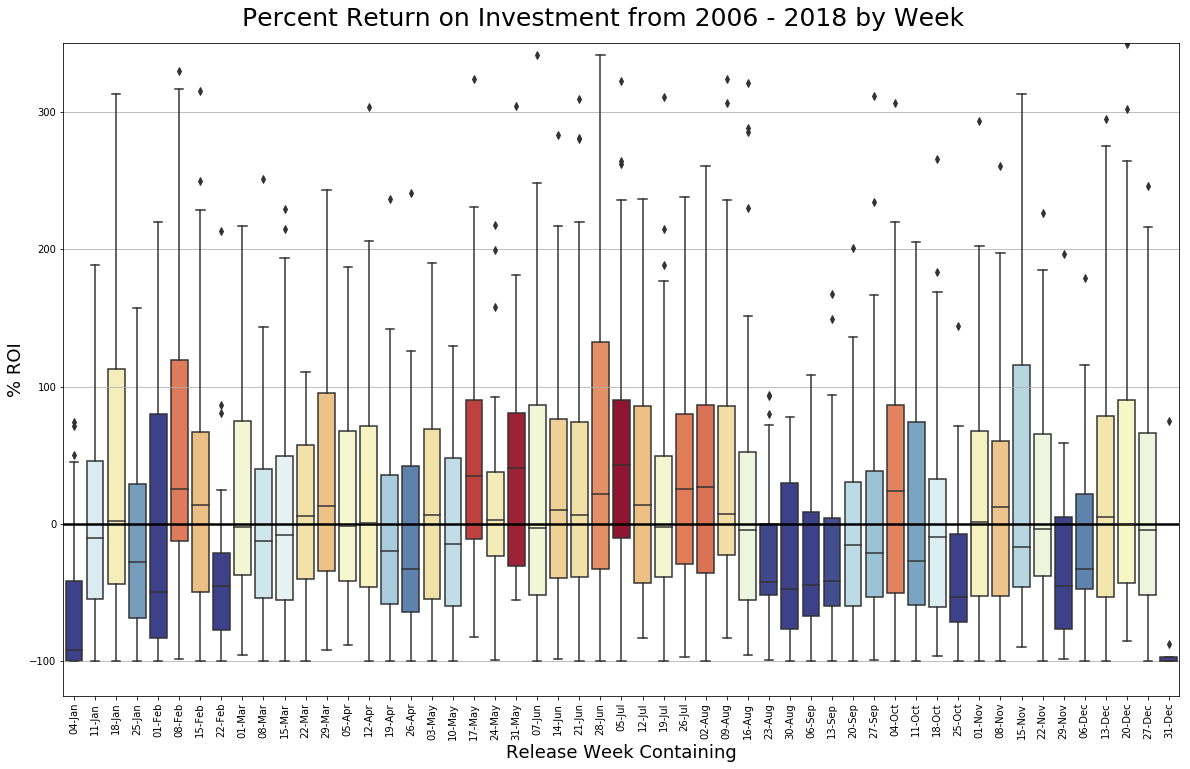

In [45]:
# #plot %ROI by weeks
# fig= plt.figure(figsize=(20,10))
# bplot = sns.boxplot(y='%ROI', x='Week', 
#                  data=MovieNums, 
#                  width=0.5,
#                  palette="Paired")
# plt.grid()
# plt.title("Percentage ROI by Release Week");


median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(0-median_vals.max(), median_vals.max()-0)
median_vals = median_vals.tolist()
colors = plt.cm.RdYlBu_r(norm(median_vals))

plt.figure(figsize=(20,12))
plt.rcParams["axes.labelsize"] = 18

plt.ylim(-125, 350)
plt.grid(b=True, which='major', axis='both')
ax = sns.boxplot(x="Week Date", y="%ROI", data=MovieNums, order = week_dates, palette=colors, showfliers=True).set(xlabel='Release Week Containing', ylabel='% ROI')
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
plt.figtext(.5,.9,'Percent Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
plt.savefig('ROI_by_Week2.jpg')
plt.xticks(rotation=90)
# ax.set_xticklabels(week_dates, rotation=30)
plt.savefig('ROI_by_Week2.jpg')
plt.show()




In [44]:
plt.savefig('ROI_by_Week2.jpg')

<Figure size 432x288 with 0 Axes>

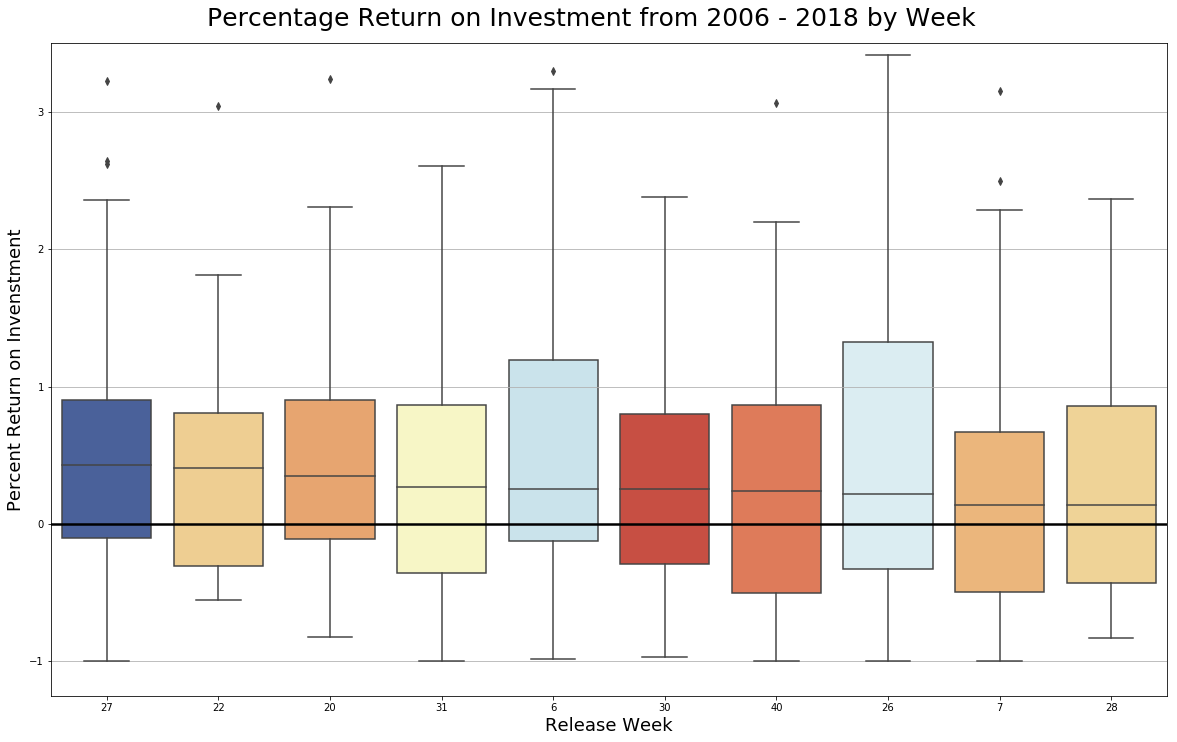

In [14]:
median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.RdYlBu_r(norm(median_vals))

plt.figure(figsize=(20,12))
plt.rcParams["axes.labelsize"] = 18
plt.ylim(-1.25, 3.5)
plt.grid(b=True, which='major', axis='both')
ax = sns.boxplot(x="Week", y="%ROI", data=MovieNums, palette=colors, order = TrunkWeeksByROI).set(xlabel='Release Week', ylabel='Percent Return on Invenstment')
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
plt.figtext(.5,.9,'Percentage Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
plt.show()

# fig= plt.figure(figsize=(25,10))
# bplot = sns.boxplot(y='%ROI', x='Week', 
#                  data=MovieNums, 
#                  width=0.5,
#                  palette="Paired", order = TrunkWeeks )
# plt.grid()
# plt.title("Top 20 Release Weeks");

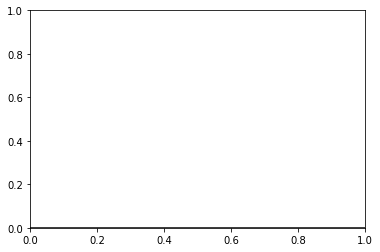

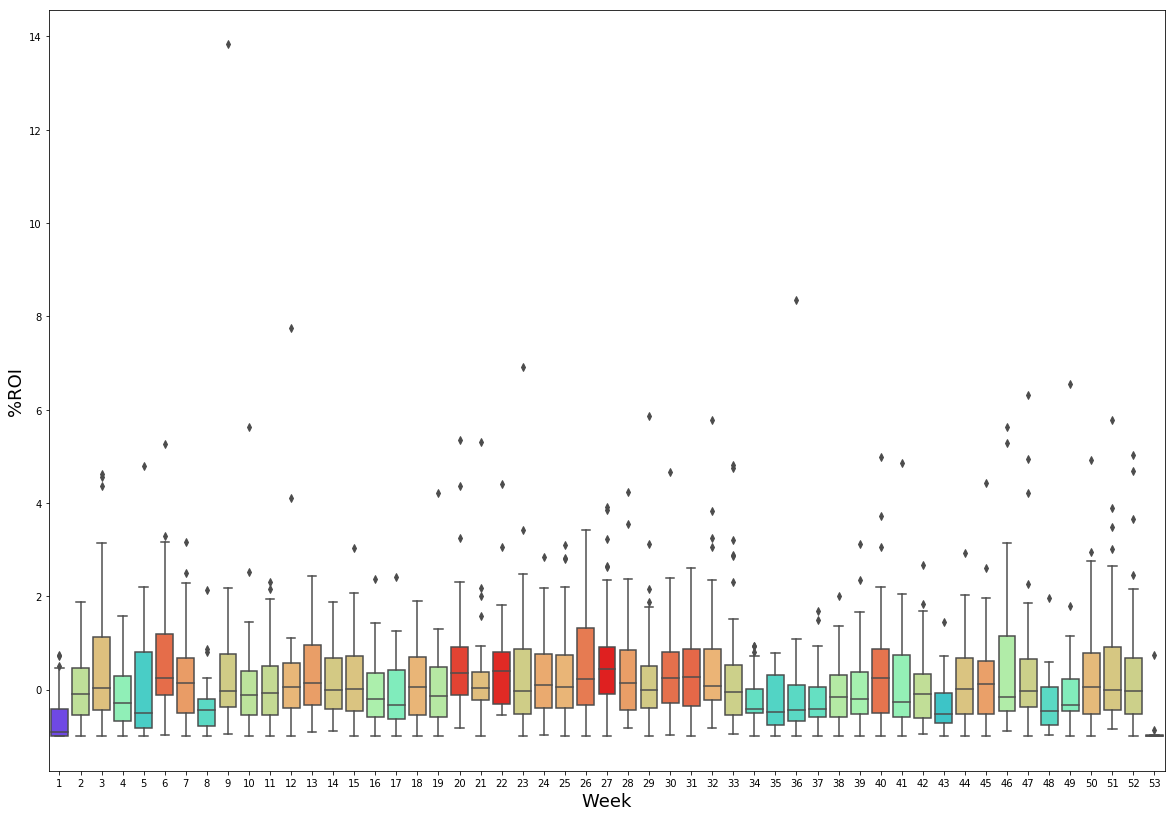

In [15]:
median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.rainbow(norm(median_vals))
plt.axhline(y=0, color = "black", label = "Break Even Point");
plt.figure(figsize=(20,14))
ax = sns.boxplot(x="Week", y="%ROI", data=MovieNums, palette=colors)
plt.show()

In [16]:
MovieNums.groupby('Week')['%ROI'].median()

Week
1    -0.913004
2    -0.102000
3     0.025773
4    -0.278102
5    -0.496067
6     0.254770
7     0.136961
8    -0.448717
9    -0.021640
10   -0.120316
11   -0.080141
12    0.061422
13    0.133749
14   -0.010876
15    0.011834
16   -0.192132
17   -0.328635
18    0.064942
19   -0.146769
20    0.350558
21    0.031581
22    0.407090
23   -0.027132
24    0.102315
25    0.065051
26    0.222995
27    0.433786
28    0.135942
29   -0.017853
30    0.254139
31    0.269916
32    0.072952
33   -0.042116
34   -0.420702
35   -0.471446
36   -0.446434
37   -0.413420
38   -0.153121
39   -0.210501
40    0.242362
41   -0.269708
42   -0.097191
43   -0.534058
44    0.013645
45    0.126445
46   -0.169439
47   -0.038364
48   -0.449204
49   -0.325112
50    0.052136
51    0.001033
52   -0.040642
53   -1.000000
Name: %ROI, dtype: float64

In [17]:
df = sns.load_dataset("tips")

median_vals = df.groupby('day')['total_bill'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
colors = plt.cm.coolwarm(norm(median_vals))

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="day", y="total_bill", data=df, palette=colors)
plt.show()

TypeError: float() argument must be a string or a number, not 'SingleBlockManager'

In [ ]:
norm

In [ ]:
median_vals[0]

In [ ]:
norm(median_vals[0])

In [ ]:
df = sns.load_dataset("tips")

median_vals = df.groupby('day')['total_bill'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.coolwarm(norm(median_vals))

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="day", y="total_bill", data=df, palette=colors)
plt.show()
